# 0.0 IMPORTS

In [1]:
import math
import inflection
import datetime

import numpy   as np
import pandas  as pd
import seaborn as sns

from IPython.core.display import HTML
from IPython.display      import Image
from matplotlib           import pyplot as plt

## 0.1 Helper Functions

## 0.2 Loading Data

In [2]:
df_sales_raw = pd.read_csv('data/train.csv', low_memory=False) #low_memory argumento que avisa para o computador                                                                 ler o arquivo todo de uma vez, se for true, vai                                                                   considerar q o pc tem pouca memória e ler pedaço                                                                 por pedaço 
df_store_raw = pd.read_csv('data/store.csv', low_memory=False)

#merge 

df_raw = pd.merge (df_sales_raw, df_store_raw, how='left', on='Store') #how = forma que você que seja concatenado                                                                        os datasets
                                                                       #on = coluna que existe em comum nos                                                                              datasets e seram referencias na                                                                                  concatenação 

# 1.0 Passo 01 - DESCRICAO DOS DADOS

In [3]:
df1 = df_raw.copy() #para evitar caso realize mudanças no dataset para não precisar rodar tudo de novo 

In [4]:
df1.columns 

Index(['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo',
       'StateHoliday', 'SchoolHoliday', 'StoreType', 'Assortment',
       'CompetitionDistance', 'CompetitionOpenSinceMonth',
       'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek',
       'Promo2SinceYear', 'PromoInterval'],
      dtype='object')

## 1.1 Rename Columns

In [5]:
cols_old = ['Store', 'DayOfWeek', 'Date', 'Sales', 'Customers', 'Open', 'Promo','StateHoliday', 'SchoolHoliday',             'StoreType', 'Assortment','CompetitionDistance', 'CompetitionOpenSinceMonth',                                     'CompetitionOpenSinceYear', 'Promo2', 'Promo2SinceWeek','Promo2SinceYear', 'PromoInterval']

snakecase = lambda x: inflection.underscore(x) # função que realizar o metodo para descrever dados

cols_new = list(map(snakecase, cols_old)) #função para aplicar uma função em todos os dados da lista mencionada

#rename 
df1.columns = cols_new #renomeando a coluna do dataset com as modificações 

## 1.2 Data Dimensions

In [6]:
print(f'Number of Rows: {df1.shape[0]}') #determinação das estruturas do tamanho do dataset
print(f'Number of Cols: {df1.shape[1]}')

Number of Rows: 1017209
Number of Cols: 18


## 1.3 Data Types

In [10]:
df1.dtypes #determinação dos tipos das variaveis 

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
dtype: object

In [8]:
df1['date'] = pd.to_datetime(df1['date'])

## 1.4 Check NA

In [9]:
df1.isna().sum() #função para ver os dados faltantes aplicados em conjuntos c a função para somar a quantidade de                   dados faltantes
                 #três formas de tratar o NA: 
                 #1 - Exclui o NA = MUito mais rapido porem perde muita informação 
                 #2 - Algoritimos de machine learning que façam a substituição baseada no comportamento da coluna
                 #3 - Pensando no negócio (entendo a variavel)

store                                0
day_of_week                          0
date                                 0
sales                                0
customers                            0
open                                 0
promo                                0
state_holiday                        0
school_holiday                       0
store_type                           0
assortment                           0
competition_distance              2642
competition_open_since_month    323348
competition_open_since_year     323348
promo2                               0
promo2_since_week               508031
promo2_since_year               508031
promo_interval                  508031
dtype: int64

## 1.5 Fillout NA

In [12]:
df1['competition_distance'].max()

75860.0

In [13]:
#competition_distance 
df1['competition_distance'] = df1['competition_distance'].apply(lambda x: 200000 if math.isnan(x) else x)
# jogamos um valor acima da maior distancia pois, não temos uma loja competitiva ou está muito longe


#competition_open_since_month 
df1['competition_open_since_month'] = df1.apply(lambda x: x['date'].month if math.isnan(x['competition_open_since_month']) else x['competition_open_since_month'], axis=1)
#Consideramos que o mes da compra é o mesmo mes para os resultados NA nesta coluna, caso contrario, retorna o mes que já é existente


#competition_open_since_year 
df1['competition_open_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['competition_open_since_year']) else x['competition_open_since_year'], axis=1)
#Consideramos que o ano da compra é o mesmo ano para os resultados NA nesta coluna, caso contrario, retorna o ano que já é existente

#promo2_since_week
df1['promo2_since_week'] = df1.apply(lambda x: x['date'].week if math.isnan(x['promo2_since_week']) else x['promo2_since_week'], axis=1)
#Consideramos que a semana da compra é o mesmo semana para os resultados NA nesta coluna, caso contrario, retorna a semana que já é existente

#promo2_since_year 
df1['promo2_since_year'] = df1.apply(lambda x: x['date'].year if math.isnan(x['promo2_since_year']) else x['promo2_since_year'], axis=1)
#Consideramos que o ano da compra é o mesmo ano para os resultados NA nesta coluna, caso contrario, retorna o ano que já é existente

#promo_interval 
month_map = {1: 'Jan', 2: 'Feb', 3: 'Mar', 4: 'Apr', 5: 'May', 6: 'Jun', 7:'Jul', 8: 'Aug', 9: 'Sept', 10: 'Oct', 11: 'Nov', 12: 'Dec'}
# dicionario criado para comparar com a coluna date, para retornar o mes, relatado na data da compra. 

df1['promo_interval'].fillna(0, inplace = True)
#transformou tudo que é NA em zero 

df1['month_map'] = df1['date'].dt.month.map(month_map) 
#coluna que retornar os meses descritos no dicionario baseado na data da compra

df1['is_promo'] = df1[['promo_interval', 'month_map']].apply(lambda x: 0 if x['promo_interval'] == 0 else 1 if x['month_map'] in x['promo_interval'].split(',') else 0, axis =1)
#coluna criada para nos retornar com 1 se a data de compra foi realizada dentro do periodo de promoção e 0 para a que não foi comprada no periodo de promoção. 

In [14]:
df1.isna().sum()

store                           0
day_of_week                     0
date                            0
sales                           0
customers                       0
open                            0
promo                           0
state_holiday                   0
school_holiday                  0
store_type                      0
assortment                      0
competition_distance            0
competition_open_since_month    0
competition_open_since_year     0
promo2                          0
promo2_since_week               0
promo2_since_year               0
promo_interval                  0
month_map                       0
is_promo                        0
dtype: int64

## 1.6 Change types

In [15]:
df1.dtypes #conferindo novamente nossos dados 

store                                    int64
day_of_week                              int64
date                            datetime64[ns]
sales                                    int64
customers                                int64
open                                     int64
promo                                    int64
state_holiday                           object
school_holiday                           int64
store_type                              object
assortment                              object
competition_distance                   float64
competition_open_since_month           float64
competition_open_since_year            float64
promo2                                   int64
promo2_since_week                      float64
promo2_since_year                      float64
promo_interval                          object
month_map                               object
is_promo                                 int64
dtype: object

In [18]:
df1['competition_open_since_month'] = df1['competition_open_since_month'].astype(int) #Função que determina a coluna como inteira
df1['competition_open_since_year'] = df1['competition_open_since_year'].astype(int)

df1['promo2_since_week'] = df1['promo2_since_week'].astype(int)
df1['promo2_since_year'] = df1['promo2_since_year'].astype(int)

## 1.7 Descriptive Statistical 

In [19]:
num_attributes = df1.select_dtypes(include = ['int64', 'float64']) #função para selecionar as colunas pelo tipe delas
cat_attributes = df1.select_dtypes(exclude = ['int64', 'float64', 'datetime64[ns]']) 

In [20]:
num_attributes.sample(2) #função que seleciona linhas aleatórias

,store,day_of_week,sales,customers,open,promo,school_holiday,competition_distance,competition_open_since_month,competition_open_since_year,promo2,promo2_since_week,promo2_since_year,is_promo
77377,443,6,3972,394,1,0,0,11400.0,12,2005,0,21,2015,0
1007931,757,3,7915,601,1,1,0,3450.0,1,2013,0,2,2013,0


In [21]:
cat_attributes.sample(2)

,state_holiday,store_type,assortment,promo_interval,month_map
530751,0,a,a,"Jan,Apr,Jul,Oct",Mar
183532,0,d,c,"Feb,May,Aug,Nov",Feb


## 1.7.1 Numerical Attributes

In [22]:
# Central Tendency - Mean, median
ct1 = pd.DataFrame (num_attributes.apply(np.mean)).T #apply função para aplicar em todas as colunas uma operação
ct2 = pd.DataFrame (num_attributes.apply(np.median)).T


# Dispersion - std, min, max, range, skew, kurtosis
d1 = pd.DataFrame (num_attributes.apply(np.std)).T
d2 = pd.DataFrame (num_attributes.apply(min)).T
d3 = pd.DataFrame (num_attributes.apply(max)).T
d4 = pd.DataFrame (num_attributes.apply(lambda x: x.max() - x.min())).T
d5 = pd.DataFrame (num_attributes.apply(lambda x: x.skew())).T
d6 = pd.DataFrame (num_attributes.apply(lambda x: x.kurtosis())).T
                   
m = pd.concat([d2,d3,d4,ct1,ct2,d1,d5,d6]).T.reset_index()
m.columns = ['attributes','min','max','range', 'mean','median','std','skew','kurtosis']

In [23]:
m

,attributes,min,max,range,mean,median,std,skew,kurtosis
0,store,1.0,1115.0,1114.0,558.429727,558.0,321.908493,-0.000955,-1.200524
1,day_of_week,1.0,7.0,6.0,3.998341,4.0,1.997390,0.001593,-1.246873
2,sales,0.0,41551.0,41551.0,5773.818972,5744.0,3849.924283,0.641460,1.778375
3,customers,0.0,7388.0,7388.0,633.145946,609.0,464.411506,1.598650,7.091773
4,open,0.0,1.0,1.0,0.830107,1.0,0.375539,-1.758045,1.090723
5,promo,0.0,1.0,1.0,0.381515,0.0,0.485758,0.487838,-1.762018
6,school_holiday,0.0,1.0,1.0,0.178647,0.0,0.383056,1.677842,0.815154
7,competition_distance,20.0,200000.0,199980.0,5935.442677,2330.0,12547.646829,10.242344,147.789712
8,competition_open_since_month,1.0,12.0,11.0,6.786849,7.0,3.311085,-0.042076,-1.232607
9,competition_open_since_year,1900.0,2015.0,115.0,2010.324840,2012.0,5.515591,-7.235657,124.071304


/home/diego/.pyenv/versions/3.10.1/envs/DsemProducao/lib/python3.10/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

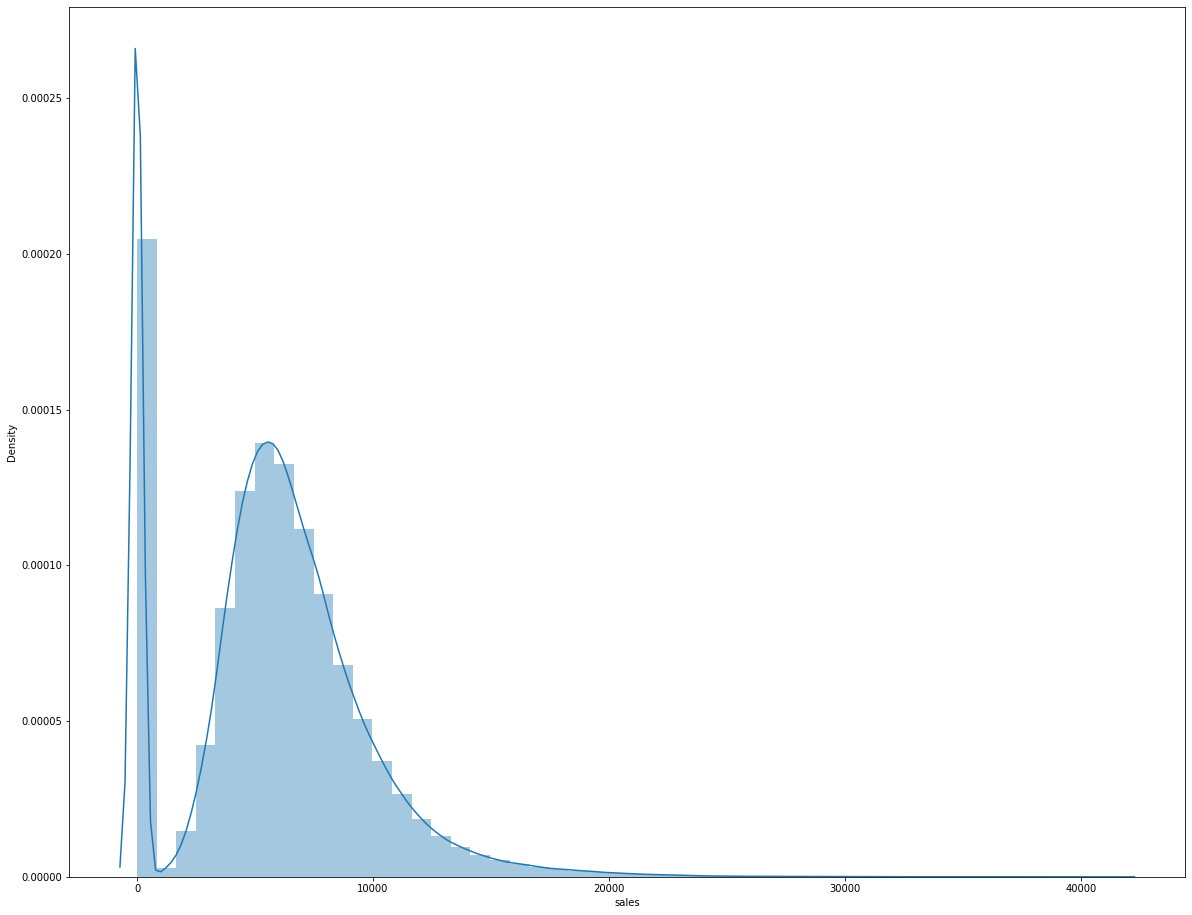

In [24]:
plt.figure(figsize=(20, 16))
sns.distplot (df1['sales'])

## 1.7.2 Categorical Attributes

In [25]:
cat_attributes.apply(lambda x: x.unique().shape[0])

state_holiday      4
store_type         4
assortment         3
promo_interval     4
month_map         12
dtype: int64

<AxesSubplot:xlabel='assortment', ylabel='sales'>

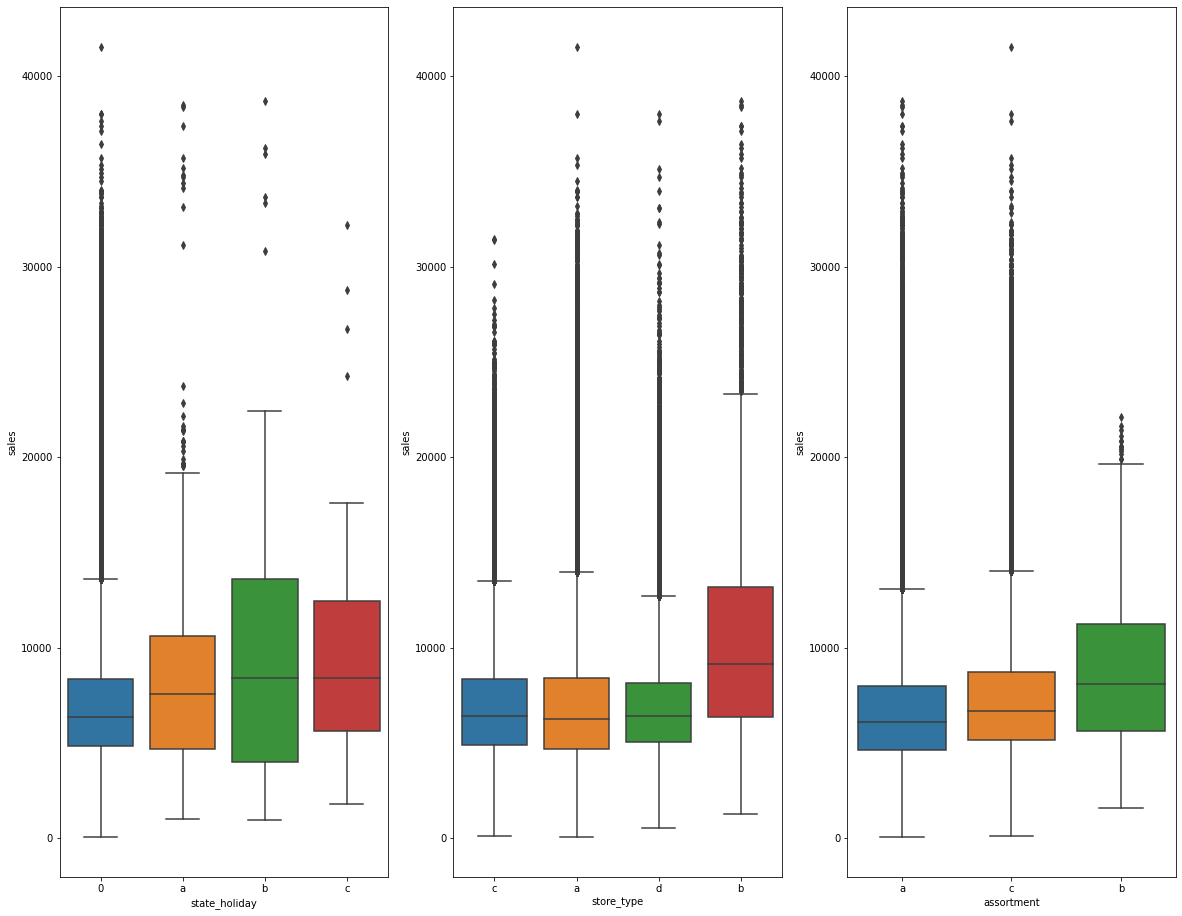

In [26]:
aux1 = df1[(df1['state_holiday'] != 0) & (df1['sales'] > 0)]

plt.figure(figsize=(20, 16))

plt.subplot(1,3,1)
sns.boxplot(x='state_holiday', y='sales', data=aux1)

plt.subplot(1,3,2)
sns.boxplot(x='store_type', y='sales', data=aux1)

plt.subplot(1,3,3)
sns.boxplot(x='assortment', y='sales', data=aux1)

# 2.0 Passo 02 - FEATURE ENGINEERING

In [27]:
df2 = df1.copy()

## 2.1 Mapa Mental de Hipóteses

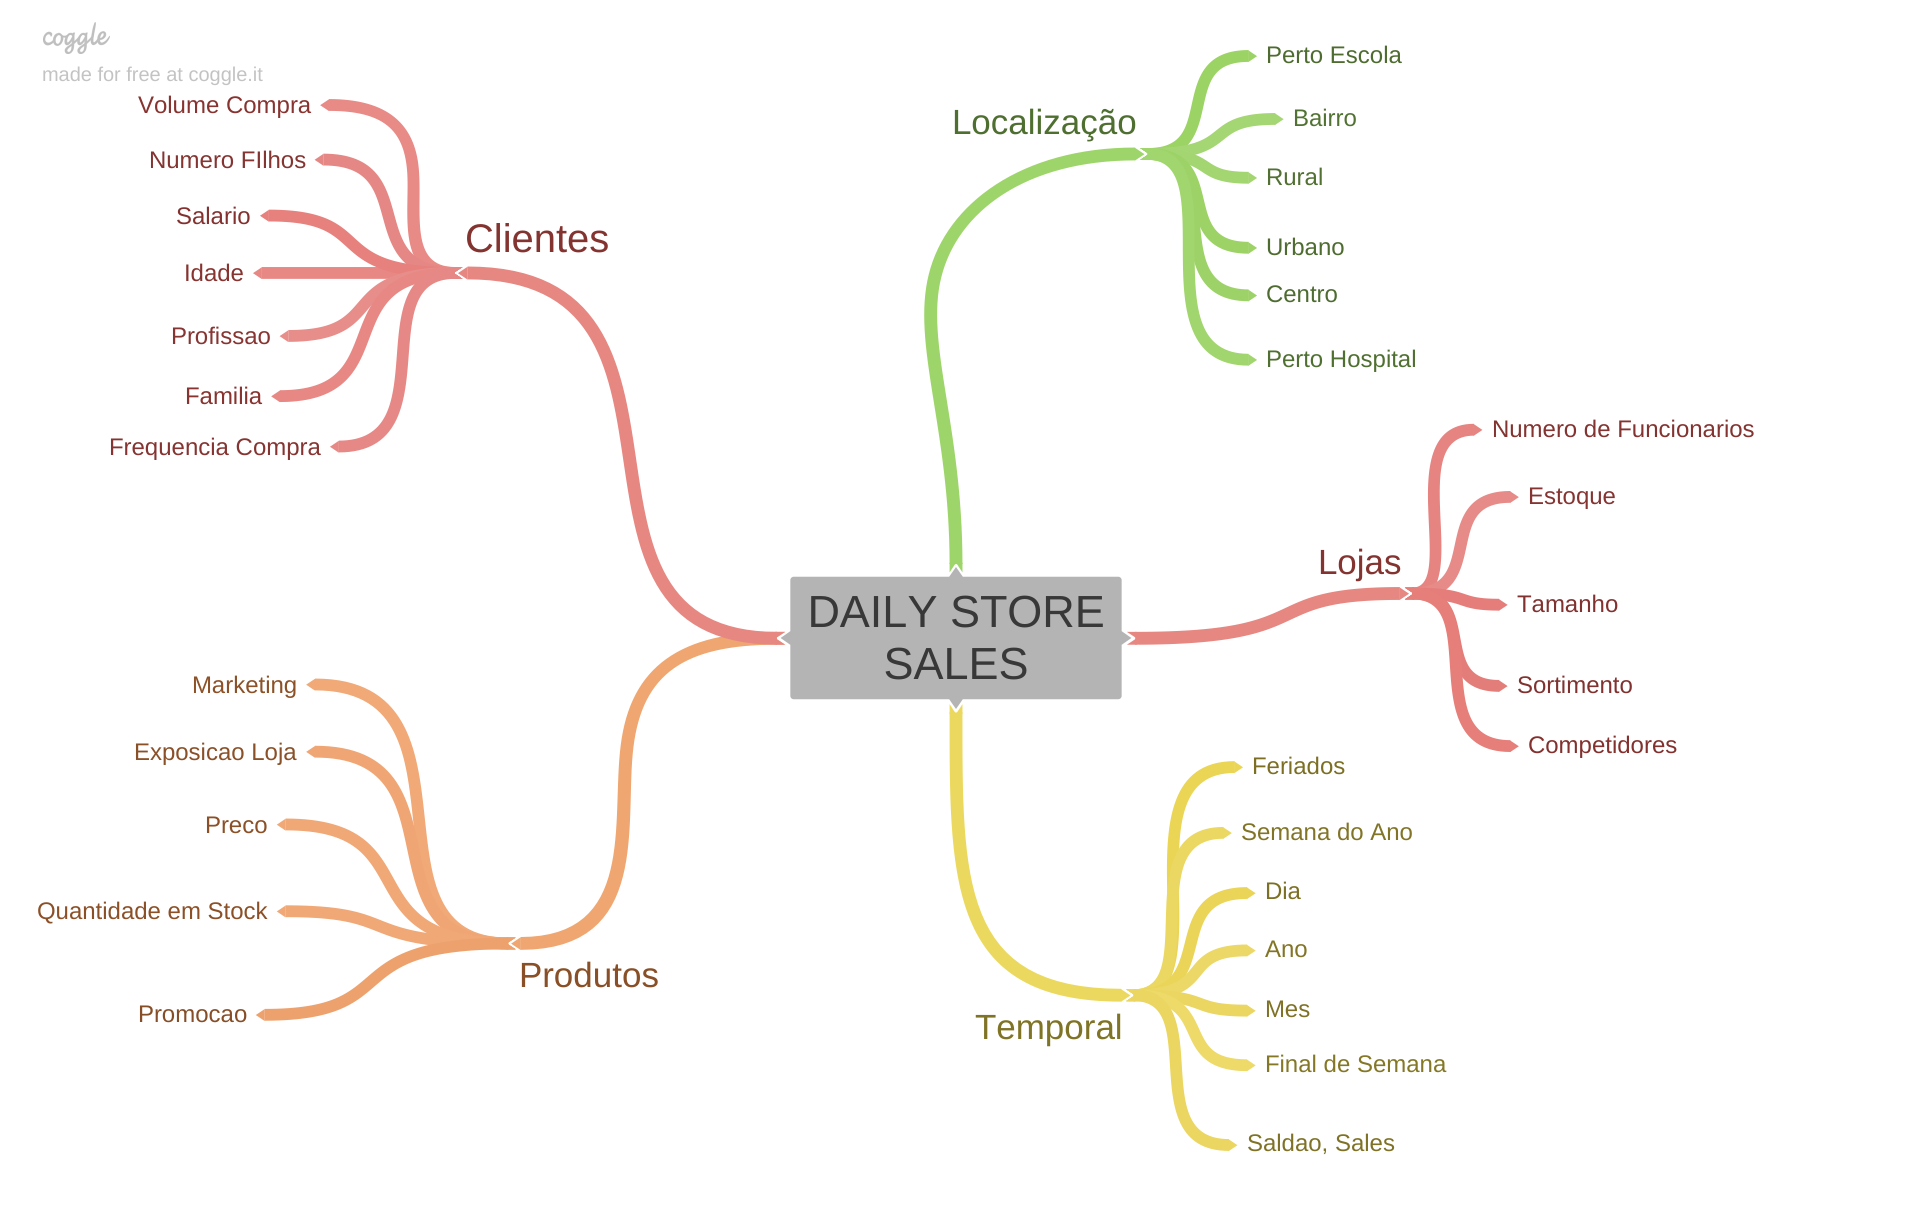

In [28]:
Image('img/MindMapHypothesis.png')

## 2.2 Criação das Hipóteses

### 2.2.1 Hipoteses Loja

**1.** Lojas com número maior de funcionários deveriam vender mais.

**2.** Lojas com maior capacidade de estoque deveriam vender mais.

**3**. Lojas com maior porte deveriam vender mais.

**4.** Lojas com maior sortimentos deveriam vender mais.

**5.** Lojas com competidores mais próximos deveriam vender menos.

**6.** Lojas com competidores à mais tempo deveriam vendem mais.

### 2.2.2 Hipoteses Produtos

**1.** Lojas que investem mais em Marketing deveriam vender mais.

**2.** Lojas com maior exposição de produto deveriam vender mais.

**3.** Lojas com produtos com preço menor deveriam vender mais.

**5.** Lojas com promoções mais agressivas ( descontos maiores ), deveriam vender mais.

**6.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**7.** Lojas com mais dias de promoção deveriam vender mais.

**8.** Lojas com mais promoções consecutivas deveriam vender mais.

### 2.2.3 Hipoteses Tempo

**1.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**2.** Lojas deveriam vender mais ao longo dos anos.

**3.** Lojas deveriam vender mais no segundo semestre do ano.

**4.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**5.** Lojas deveriam vender menos aos finais de semana.

**6.** Lojas deveriam vender menos durante os feriados escolares.

### 2.2.4 Lista Final de Hipóteses

**1.** Lojas com maior sortimentos deveriam vender mais.

**2.** Lojas com competidores mais próximos deveriam vender menos.

**3.** Lojas com competidores à mais tempo deveriam vendem mais.

**4.** Lojas com promoções ativas por mais tempo deveriam vender mais.

**5.** Lojas com mais dias de promoção deveriam vender mais.

**6.** Lojas com mais promoções consecutivas deveriam vender mais.

**7.** Lojas abertas durante o feriado de Natal deveriam vender mais.

**8.** Lojas deveriam vender mais ao longo dos anos.

**9.** Lojas deveriam vender mais no segundo semestre do ano.

**10.** Lojas deveriam vender mais depois do dia 10 de cada mês.

**11.** Lojas deveriam vender menos aos finais de semana.

**12.** Lojas deveriam vender menos durante os feriados escolares.

## 2.4 Feature Engineering

In [29]:
#year
df2['year'] = df2['date'].dt.year #função para extrair somente o ano da data

#month
df2['month'] = df2['date'].dt.month #função para extrair somente o mês da data

#day
df2['day'] = df2['date'].dt.day #função para extrair somente o dia da data

#week of year
df2['week_of_week'] = df2['date'].dt.weekofyear #função que retorna o número da semana da data

#year week
df2['year_week'] = df2['date'].dt.strftime('%Y-%W') #função que retorna uma string do objeto da data

#competition since
df2['competition_since'] = df2.apply(lambda x: datetime.datetime(year=x['competition_open_since_year'], month=x['competition_open_since_month'],day=1 ), axis=1 ) # função para pegar dados de uma data em diferentes colunas 
df2['competition_time_month'] = ((df2['date']-df2['competition_since'] )/30).apply( lambda x: x.days).astype(int) #função que extrai os dias da diferença entre duas datas

#promo since
df2['promo_since'] = df2['promo2_since_year'].astype(str) + '-' + df2['promo2_since_week'].astype(str) #transformação da data em string para realizar o join entre elas, separadas por um traço

df2['promo_since'] = df2['promo_since'].apply(lambda x: datetime.datetime.strptime(x +'-1', '%Y-%W-%w')-datetime.timedelta(days=7)) #formatar a data para saber o inicio da promoçao 

df2['promo_time_week'] = ((df2['date'] - df2['promo_since'])/7).apply(lambda x: x.days ).astype(int) #quantidade de semanas que a promoção ficou ativa

#assortment
df2['assortment'] = df2['assortment'].apply(lambda x: 'basic' if x == 'a' else 'extra' if x == 'b' else 'extended') # substituição das letras da coluna assortment pela palavra que representa

#state holiday
df2['state_holiday'] = df2['state_holiday'].apply( lambda x: 'public_holiday'if x == 'a' else 'easter_holiday' if x == 'b' else 'christmas' if x == 'c' else 'regular_day' ) # substituição das letras da coluna state holiday pela palavra que representa

/tmp/ipykernel_4197/305020048.py:11: FutureWarning: Series.dt.weekofyear and Series.dt.week have been deprecated. Please use Series.dt.isocalendar().week instead.
  df2['week_of_week'] = df2['date'].dt.weekofyear #função que retorna o número da semana da data


In [32]:
df2.head().T

,0,1,2,3,4
store,1,2,3,4,5
day_of_week,5,5,5,5,5
date,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00,2015-07-31 00:00:00
sales,5263,6064,8314,13995,4822
customers,555,625,821,1498,559
open,1,1,1,1,1
promo,1,1,1,1,1
state_holiday,regular_day,regular_day,regular_day,regular_day,regular_day
school_holiday,1,1,1,1,1
store_type,c,a,a,c,a


# 3.0 Passo 03 - FILTRAGEM DE VARIÁVEIS 

In [30]:
df3 = df2.copy()

In [31]:
df3.head()

,store,day_of_week,date,sales,customers,open,promo,state_holiday,school_holiday,store_type,...,is_promo,year,month,day,week_of_week,year_week,competition_since,competition_time_month,promo_since,promo_time_week
0,1,5,2015-07-31,5263,555,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2008-09-01,84,2015-07-27,0
1,2,5,2015-07-31,6064,625,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2007-11-01,94,2010-03-22,279
2,3,5,2015-07-31,8314,821,1,1,regular_day,1,a,...,1,2015,7,31,31,2015-30,2006-12-01,105,2011-03-28,226
3,4,5,2015-07-31,13995,1498,1,1,regular_day,1,c,...,0,2015,7,31,31,2015-30,2009-09-01,71,2015-07-27,0
4,5,5,2015-07-31,4822,559,1,1,regular_day,1,a,...,0,2015,7,31,31,2015-30,2015-04-01,4,2015-07-27,0


## 3.1 Filtragem das Linhas

In [33]:
df3 = df3[(df3['open'] != 0) & (df3['sales'] > 0)]

## 3.2 Selecao das Colunas

In [34]:
cols_drop = ['customers', 'open', 'promo_interval','month_map']  # Não terei a previsão de pessoas daqui 6                                                                          semanas 
                                                                 # Não interessa mais a informação 'open' pois já                                                                    filtramos as vezes que está aberta
                                                                 # colunas auxiliares 
df3 = df3.drop (cols_drop, axis = 1)

In [35]:
df3.columns

Index(['store', 'day_of_week', 'date', 'sales', 'promo', 'state_holiday',
       'school_holiday', 'store_type', 'assortment', 'competition_distance',
       'competition_open_since_month', 'competition_open_since_year', 'promo2',
       'promo2_since_week', 'promo2_since_year', 'is_promo', 'year', 'month',
       'day', 'week_of_week', 'year_week', 'competition_since',
       'competition_time_month', 'promo_since', 'promo_time_week'],
      dtype='object')